In [52]:
import os
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math
import datetime as dt
%matplotlib inline

In [4]:
#Save the list of all csv files
csv3 = pd.read_csv('data1_cleaned.csv')
csv4 = pd.read_csv('data2_cleaned.csv')
csv1 = pd.read_csv('data3_cleaned.csv')
csv2 = pd.read_csv('data4_cleaned.csv')

In [6]:
#Merged all files in the list based on matching 'customer id' column
csv1_2 = pd.merge(csv1, csv2, on=['customer_id'])
csv1_2_3 = pd.merge(csv1_2, csv3, on=['customer_id'])

In [7]:
#Export to csv
csv1_2_3.to_csv( "merged.csv", index=False, encoding='utf-8-sig')

In [8]:
#Ascending order
df = csv1_2_3.sort_values(by=['customer_id'])

In [9]:
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
10,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
8,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
7,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,40618.0
6,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19964,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0
19966,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
19962,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0
19963,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19968 non-null  int64  
 1   first_name                           19968 non-null  object 
 2   last_name                            19326 non-null  object 
 3   gender                               19968 non-null  object 
 4   past_3_years_bike_related_purchases  19968 non-null  int64  
 5   dob                                  19522 non-null  object 
 6   job_title                            19968 non-null  object 
 7   job_industry_category                19968 non-null  object 
 8   wealth_segment                       19968 non-null  object 
 9   deceased_indicator                   19968 non-null  bool   
 10  owns_car                             19968 non-null  bool   
 11  tenure                      

In [11]:
df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date
count,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19794.000000,19968.000000
mean,1740.254307,48.757412,10.689052,2987.623347,7.516376,9997.846504,45.365986,0.501102,1107.780004,556.082756,38198.751474
std,1009.819066,28.611359,5.611093,851.306647,2.824783,5773.929973,30.750115,0.500011,582.852548,405.798188,2860.784340
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000,33259.000000
25%,861.750000,24.000000,6.000000,2200.000000,6.000000,4997.750000,18.000000,0.000000,575.270000,215.140000,35667.000000
50%,1739.500000,48.000000,11.000000,2767.000000,8.000000,9996.500000,44.000000,1.000000,1163.890000,507.580000,38206.000000
75%,2614.250000,73.000000,15.000000,3754.000000,10.000000,14996.250000,72.000000,1.000000,1635.300000,795.100000,40672.000000
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,20000.000000,100.000000,1.000000,2091.470000,1759.850000,42710.000000


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              642
gender                                   0
past_3_years_bike_related_purchases      0
dob                                    446
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_lin

In [14]:
df['last_name'].fillna(method='ffill', inplace = True)

In [15]:
df['dob'].fillna(method='ffill', inplace = True)

In [16]:
df.standard_cost.mode()

0    388.92
Name: standard_cost, dtype: float64

In [17]:
df.standard_cost.mean()

556.0827558856358

In [18]:
df['standard_cost'].fillna(df['standard_cost'].mean(), inplace = True)

In [19]:
df.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
dob                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class   

In [20]:
df['dob'] = df['dob'].apply(pd.to_datetime)

In [21]:
df.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
dob                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                               bool
owns_car                                         bool
tenure                                        float64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
transaction_id                                  int64
product_id                  

In [22]:
ref_date = dt.datetime.now()
df['Age'] = df['dob'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))

In [23]:
df = df[df.Age < 100]

In [24]:
df['transaction_month'] = pd.DatetimeIndex(df['dob']).month

C:\Users\Akshaj Kabthiyal\AppData\Local\Temp\ipykernel_5884\1124754184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction_month'] = pd.DatetimeIndex(df['dob']).month


In [25]:
df['profit'] = df['list_price'] - df['standard_cost']

C:\Users\Akshaj Kabthiyal\AppData\Local\Temp\ipykernel_5884\1975842600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit'] = df['list_price'] - df['standard_cost']


In [26]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,70,10,90.10
10,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,70,10,110.56
8,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0,70,10,75.14
7,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Giant Bicycles,Standard,medium,medium,642.70,211.37,40618.0,70,10,431.33
6,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0,70,10,709.34


In [27]:
df.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit
19964,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,56,7,827.16
19966,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,Solex,Standard,medium,medium,71.49,53.62,41245.0,56,7,17.87
19962,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,56,7,198.22
19963,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,56,7,15.08
19967,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0,56,7,144.26


# Data Visualization

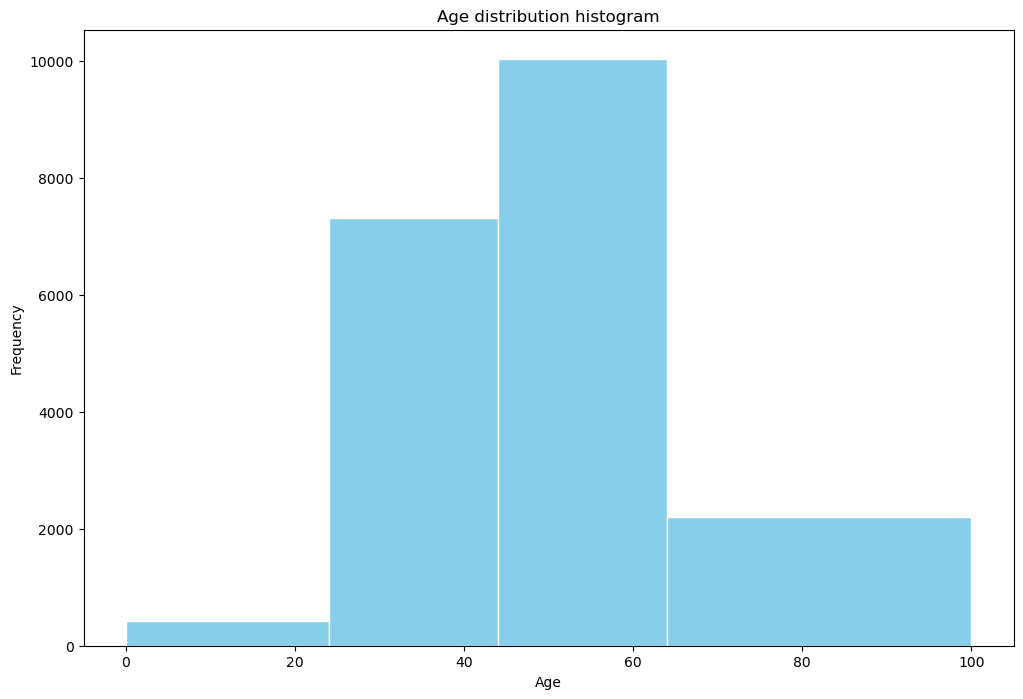

In [28]:
#Data visualisation
plt.figure(figsize = (12,8))
plt.hist(df['Age'], color = 'skyblue', edgecolor = 'white', bins=[0,24,44,64,100])
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_dist_histogram.png')
plt.show()

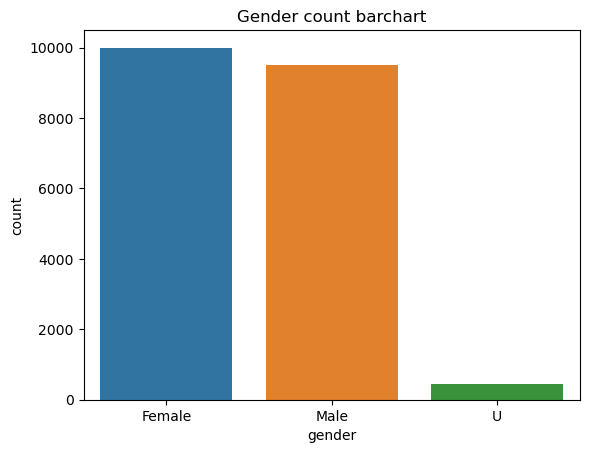

In [29]:
sn.countplot(x = 'gender', data = df)
plt.title('Gender count barchart')
plt.savefig('gender_count_original.png')
plt.show()

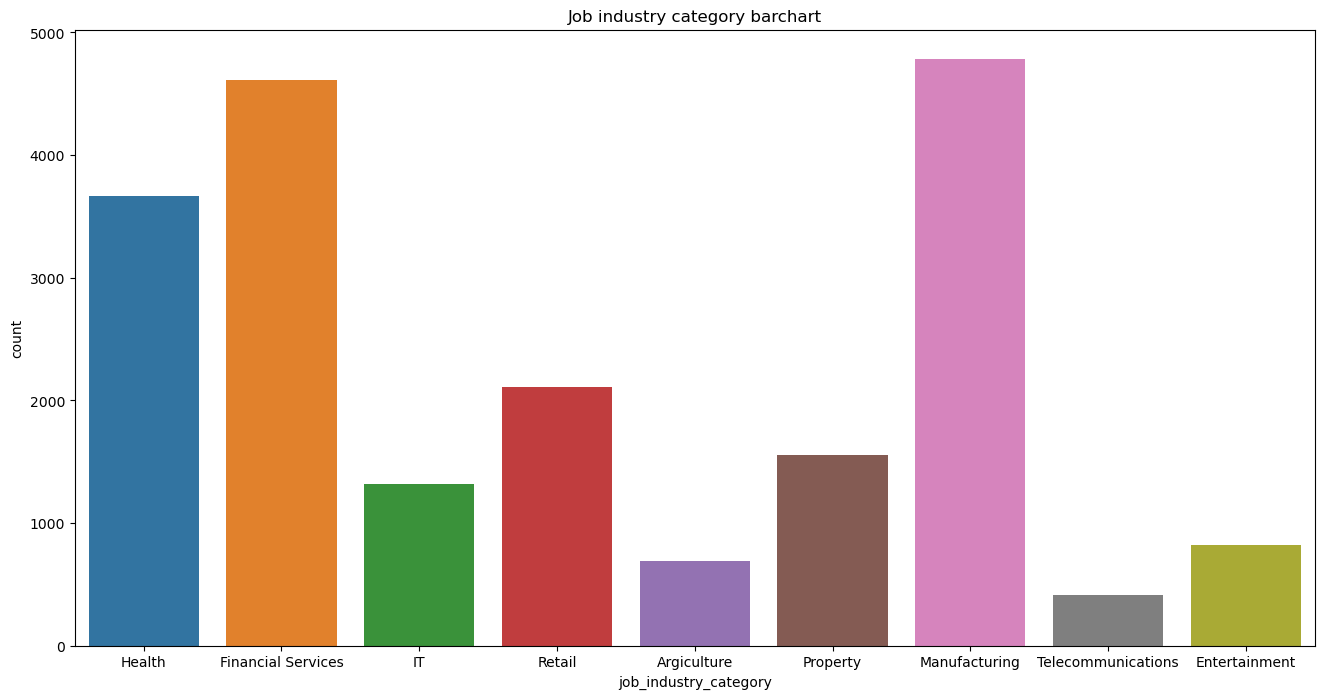

In [30]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data = df)
plt.title('Job industry category barchart')
plt.savefig('job_industry_original.png')
plt.show()

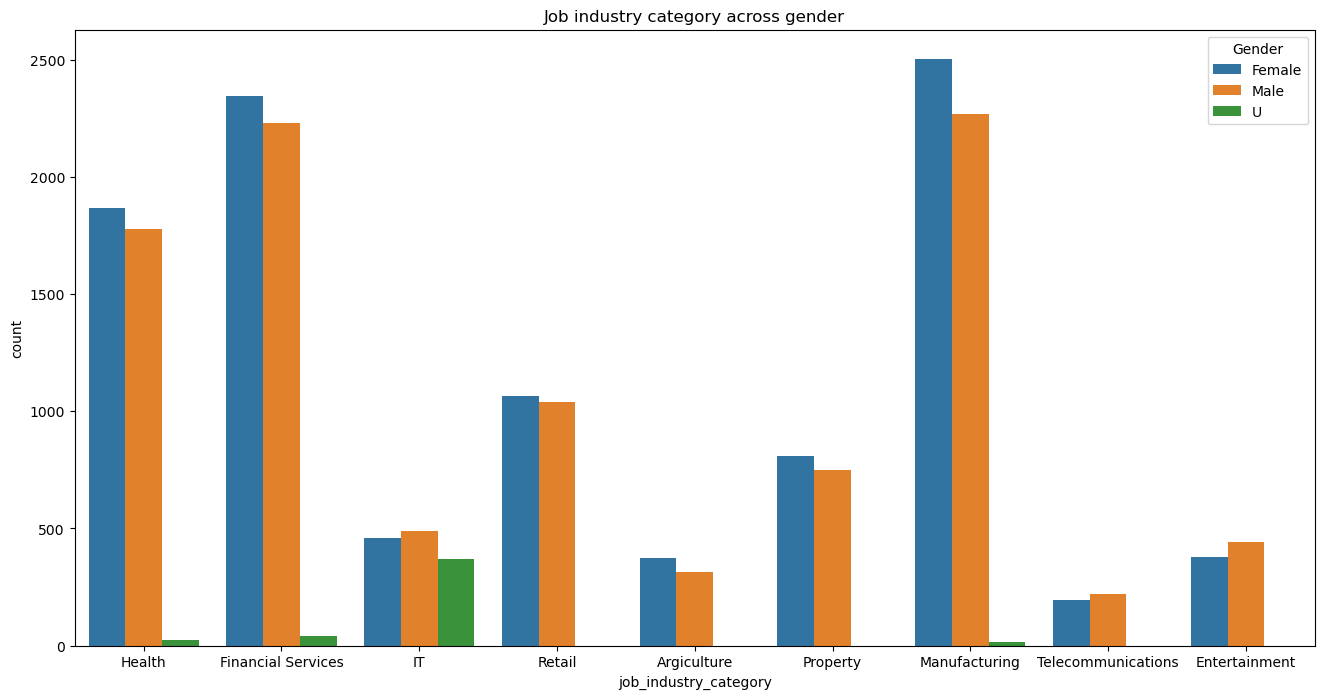

In [31]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data=df, hue='gender')
plt.legend(title='Gender', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.savefig('job_industry-gender_original.png')
plt.show()

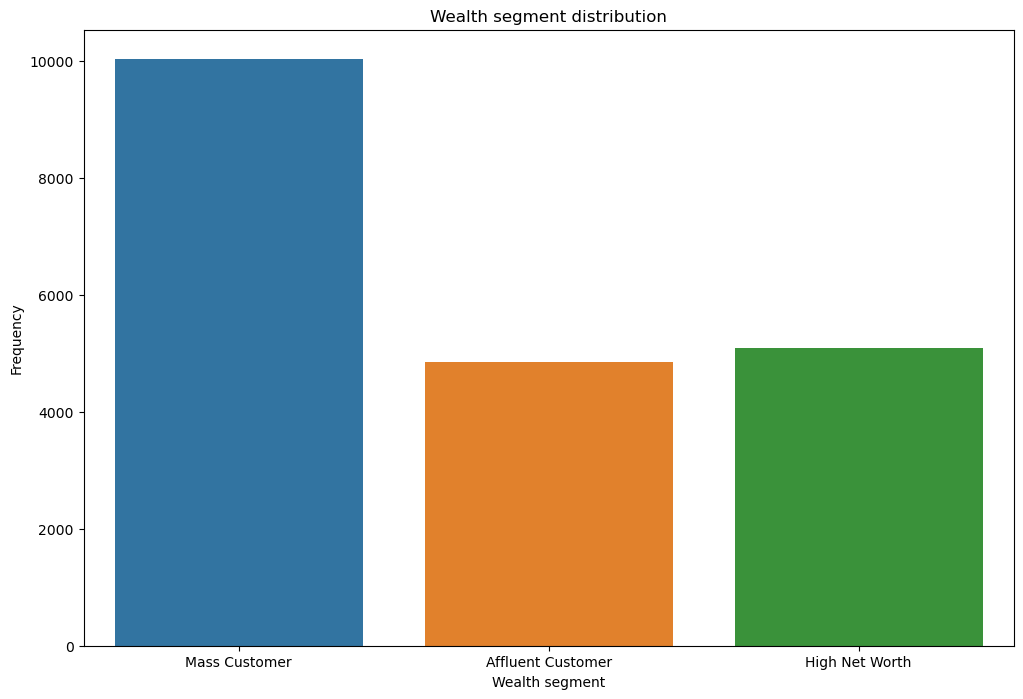

In [32]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'wealth_segment', data = df)
plt.title('Wealth segment distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
plt.savefig('wealth_segment_original.png')
plt.show()

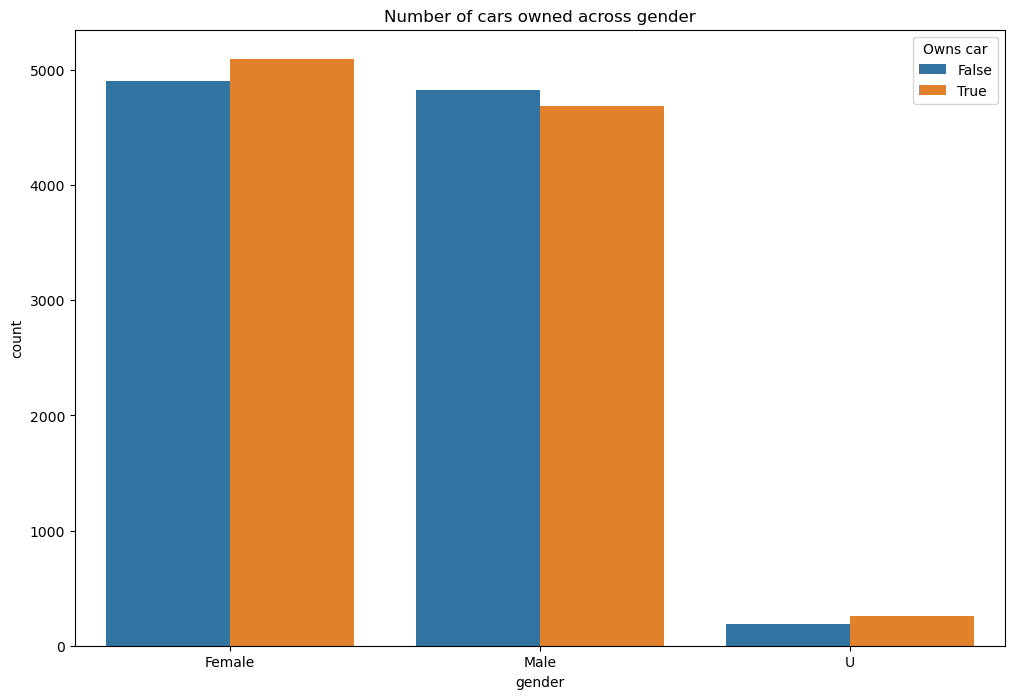

In [33]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df, hue='owns_car')
plt.legend(title='Owns car', loc='upper right', fancybox=True)
plt.title('Number of cars owned across gender')
plt.savefig('owns_car_original.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

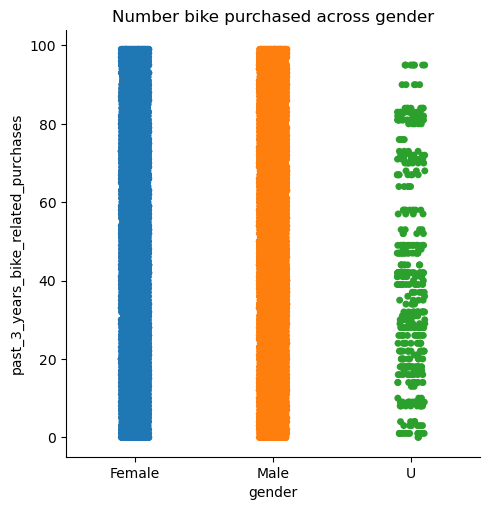

In [34]:
plt.figure(figsize = (12,8))
sn.catplot(data=df, x='gender', y='past_3_years_bike_related_purchases')
plt.title('Number bike purchased across gender')
plt.savefig('bike_purchase_original.png')
plt.show()

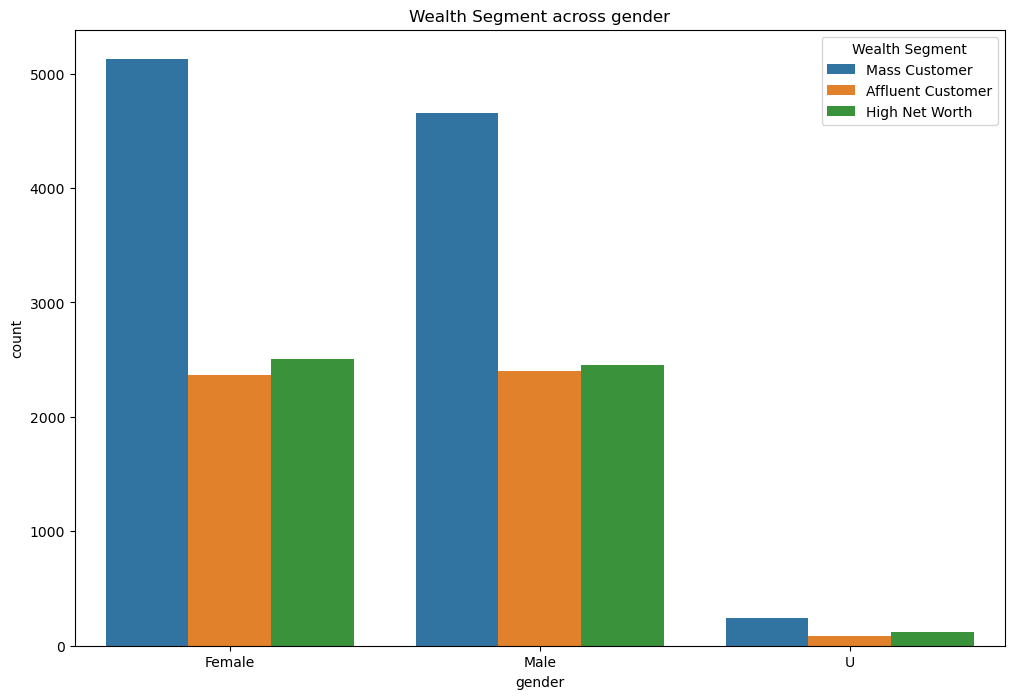

In [35]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df, hue='wealth_segment')
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across gender')
plt.savefig('wealth_segment-gender_original.png')
plt.show()

<Figure size 1600x800 with 0 Axes>

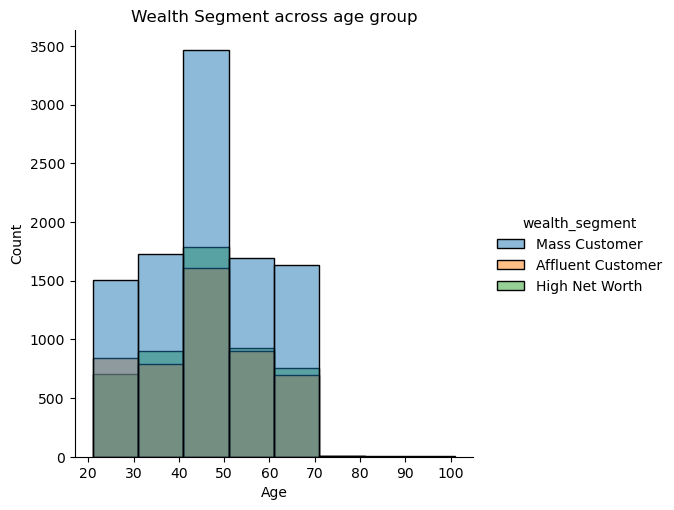

In [36]:
plt.figure(figsize = (16,8))
sn.displot(x='Age', binwidth=10, data=df, hue='wealth_segment')
plt.title('Wealth Segment across age group')
plt.savefig('wealth_segment-age_original.png')
plt.show()

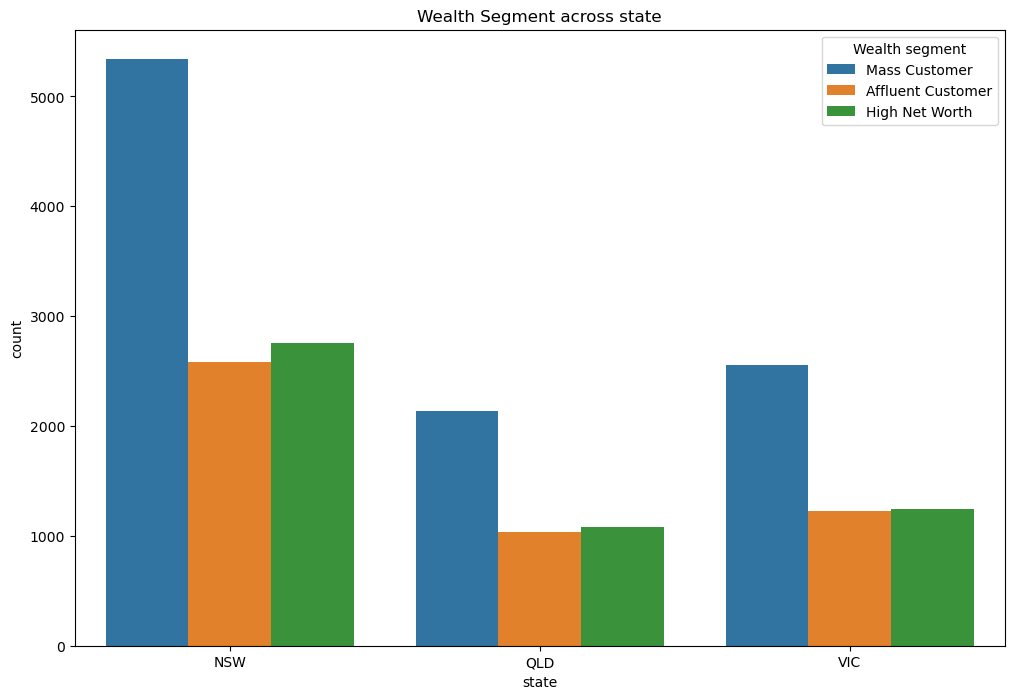

In [37]:
plt.figure(figsize = (12,8))
sn.countplot(x='state', data=df, hue='wealth_segment')
plt.legend(title='Wealth segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across state')
plt.savefig('wealth_segment-state_original.png')
plt.show()

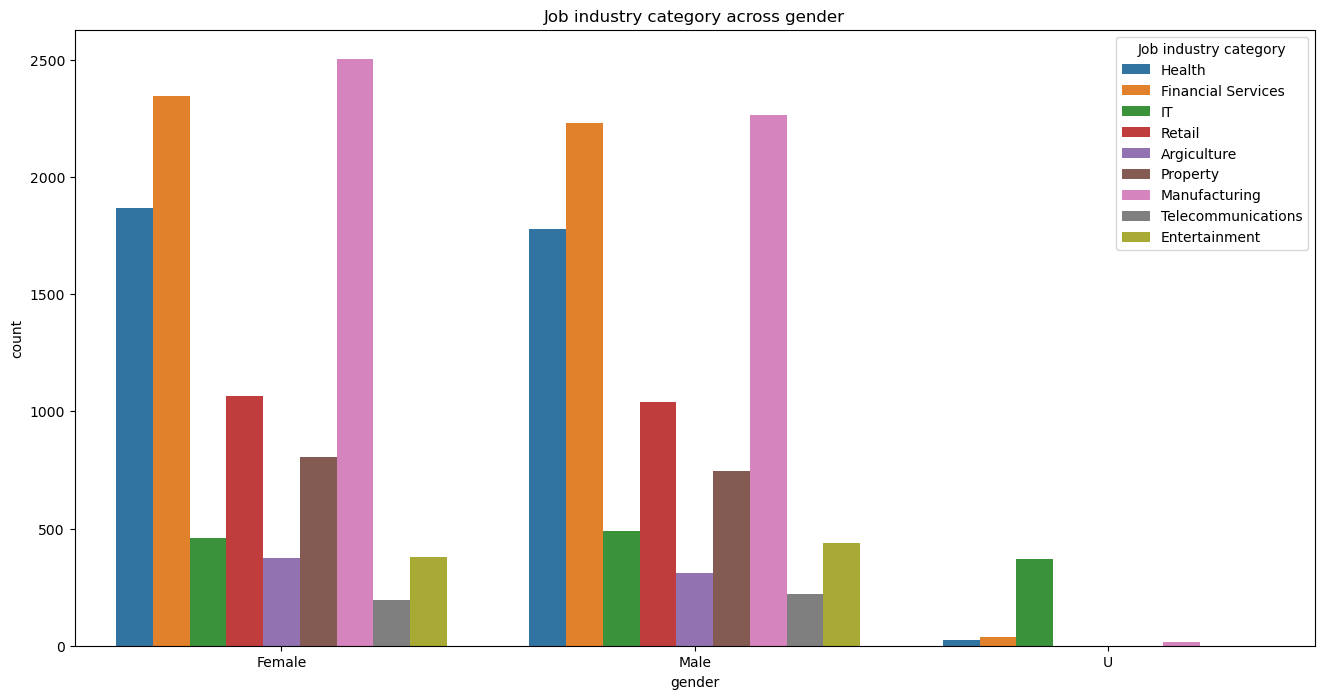

In [38]:
plt.figure(figsize=(16,8))
sn.countplot(x='gender', data=df, hue='job_industry_category', order = df['gender'].value_counts().index)
plt.legend(title='Job industry category', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.savefig('job_industry-gender_original.png')
plt.show()

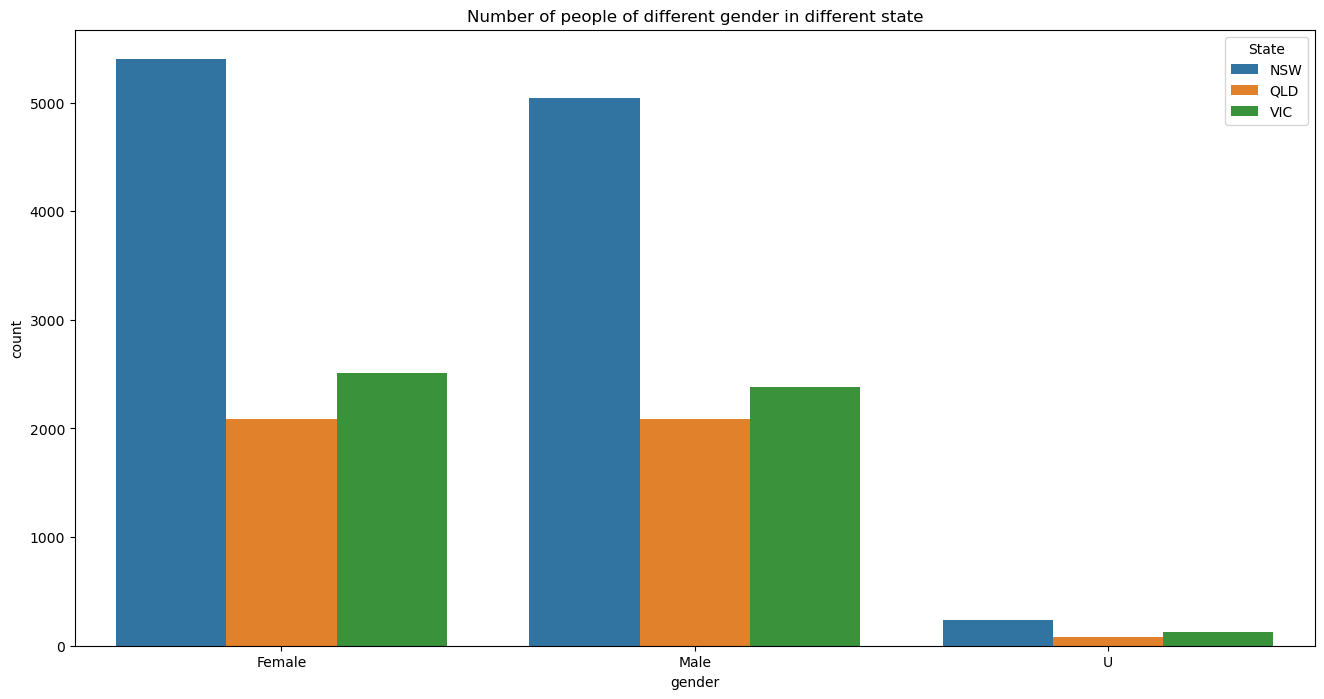

In [39]:
plt.figure(figsize = (16,8))
sn.countplot(x='gender', data=df, hue='state')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people of different gender in different state')
plt.savefig('state-gender_original.png')
plt.show()

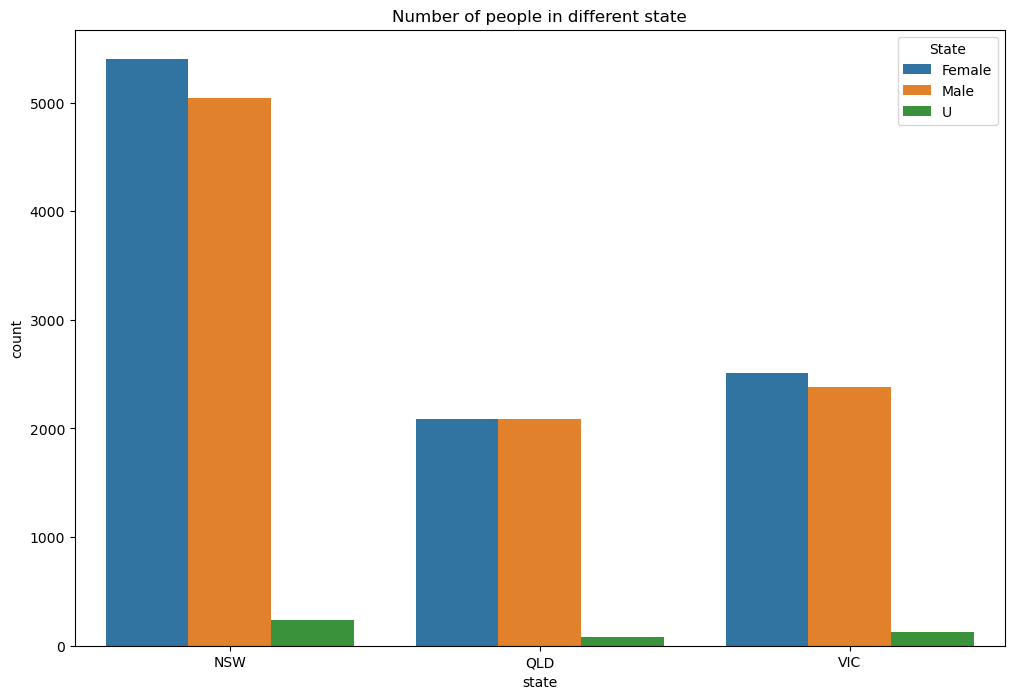

In [40]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'state', data = df, hue = 'gender')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people in different state')
plt.savefig('gender-state_original.png')
plt.show()

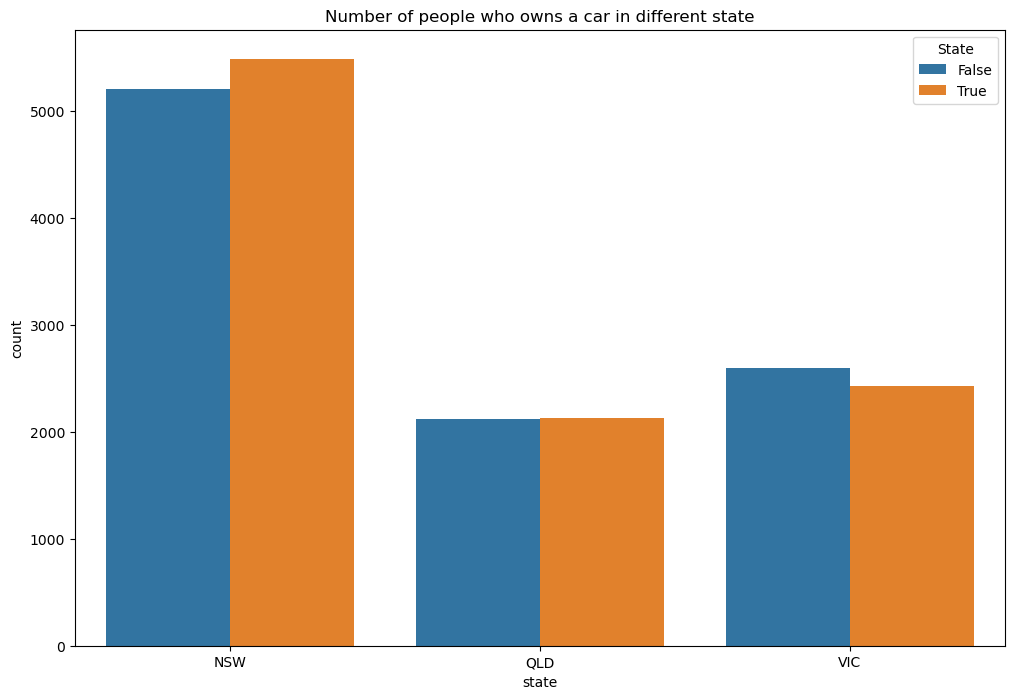

In [41]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'state', data = df, hue = 'owns_car')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people who owns a car in different state')
plt.savefig('owns_car-state_original.png')
plt.show()

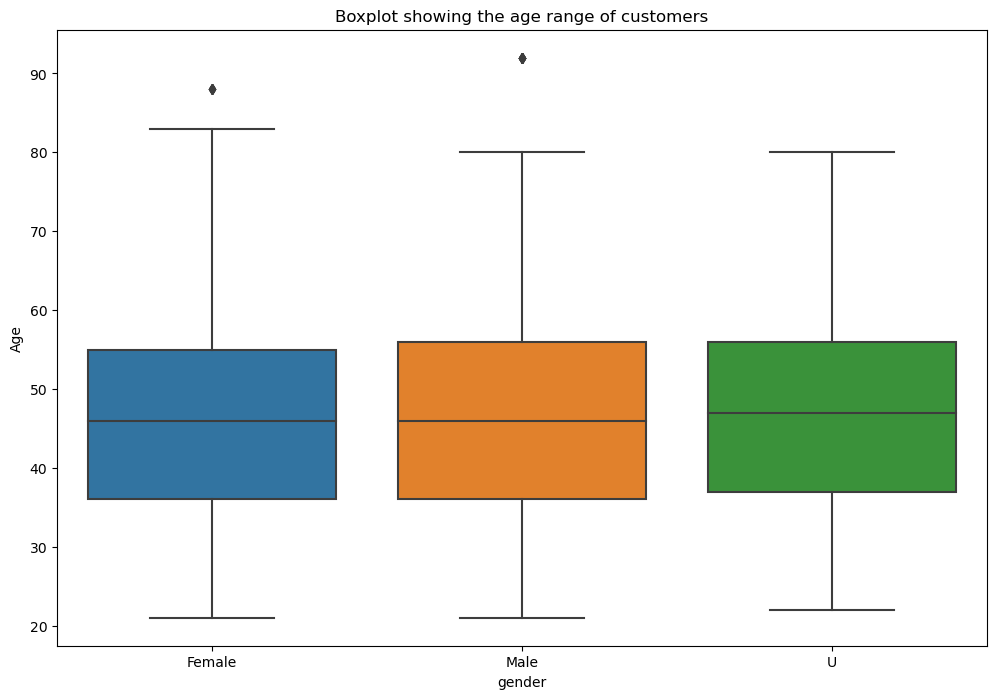

In [42]:
plt.figure(figsize = (12,8))
sn.boxplot(x = df['gender'], y = df['Age'])
plt.title('Boxplot showing the age range of customers')
plt.savefig('age_boxplot_original.png')
plt.show()

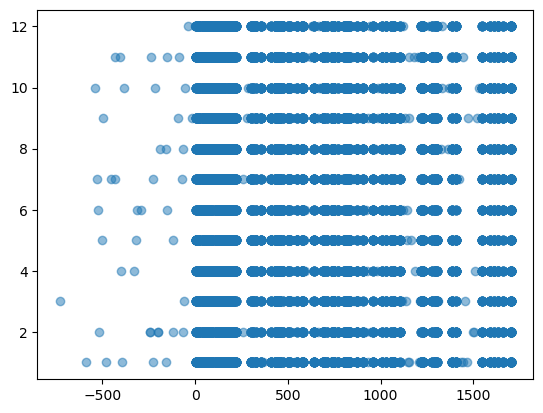

In [43]:
plt.scatter(df['profit'], df['transaction_month'], alpha=0.5)
colors=np.random.rand()
plt.show()

In [44]:
df2 = csv4

In [45]:
df2

,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rank,value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.719
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.719
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.719
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            1000 non-null   object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   dob                                  1000 non-null   object 
 5   job_title                            1000 non-null   object 
 6   job_industry_category                1000 non-null   object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [47]:
df2.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,rank,value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881722
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293550
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649500
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.719000


In [48]:
df2.duplicated().sum()

0

In [49]:
df2.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
dob                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
rank                                   0
value                                  0
dtype: int64

In [53]:
df2['new_id'] = df2.index

In [54]:
df2['dob'] = pd.to_datetime(df2['dob'], errors='coerce')

In [55]:
df2.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
dob                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
rank                                            int64
value                                         float64
new_id                      

In [56]:
df2['dob'] = df2['dob'].apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')

In [57]:
df2['dob'].astype('datetime64')

0     1957-07-12
1     1970-03-22
2     1974-08-28
3     1979-01-28
4     1965-09-21
         ...    
995   1959-10-07
996   2001-10-17
997   1954-10-05
998   1952-12-17
999   1955-10-02
Name: dob, Length: 1000, dtype: datetime64[ns]

In [58]:
df2['dob'] = df2['dob'].fillna(df2['dob'].mode())

In [59]:
ref_date2 = dt.datetime.now()
df2['Age'] = df2['dob'].apply(lambda x: len(pd.date_range(start = x, end = ref_date2, freq = 'Y')) if str(x) else None)

In [60]:
df2

,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rank,value,new_id,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.719,0,66.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.719,1,53.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.719,2,49.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703,3,44.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703,4,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374,995,64.0
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357,996,22.0
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357,997,69.0
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357,998,71.0


In [61]:
df2 = df2[df2.Age < 100]

# Data visualisation


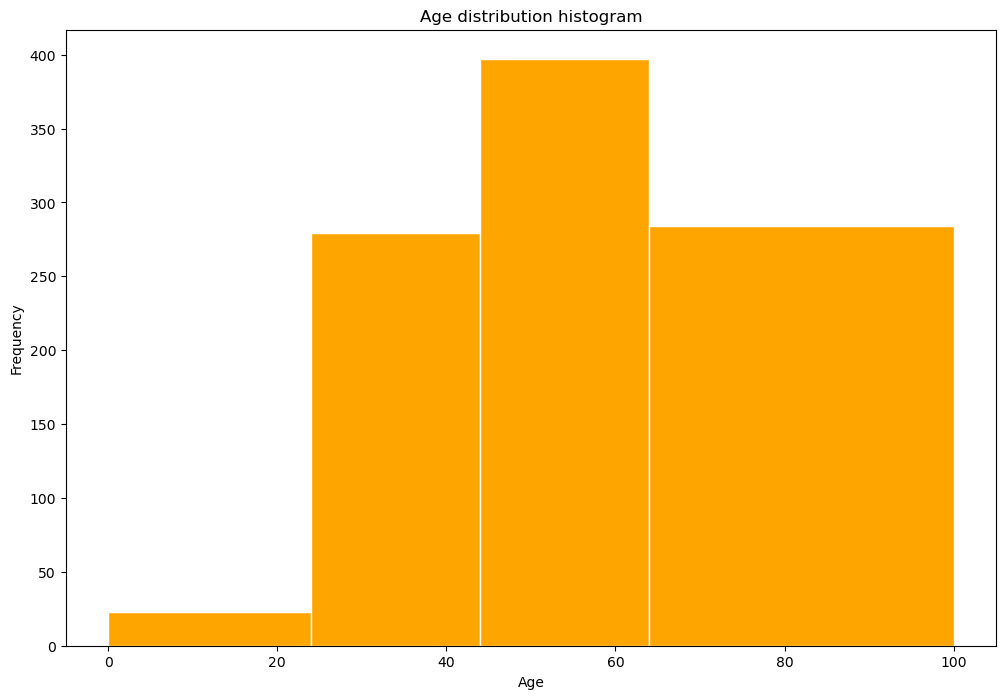

In [62]:
plt.figure(figsize = (12,8))
plt.hist(df2['Age'], color = 'orange', edgecolor = 'white', bins=[0,24,44,64,100])
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_dist_histogram2.png')
plt.show()

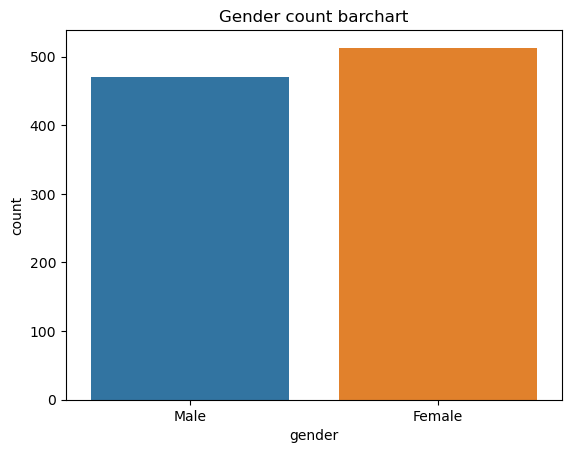

In [63]:
sn.countplot(x = 'gender', data = df2)
plt.title('Gender count barchart')
plt.savefig('gender_count_new.png')
plt.show()

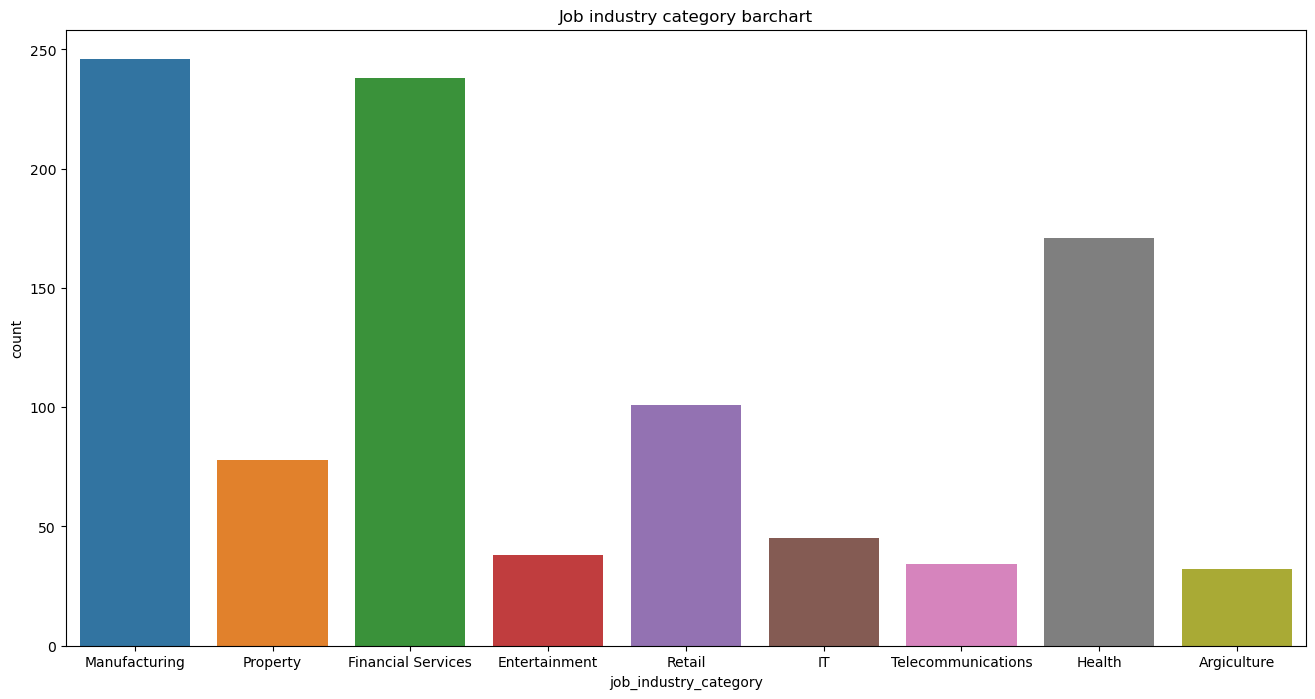

In [64]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data = df2)
plt.title('Job industry category barchart')
plt.savefig('job_industry_new.png')
plt.show()

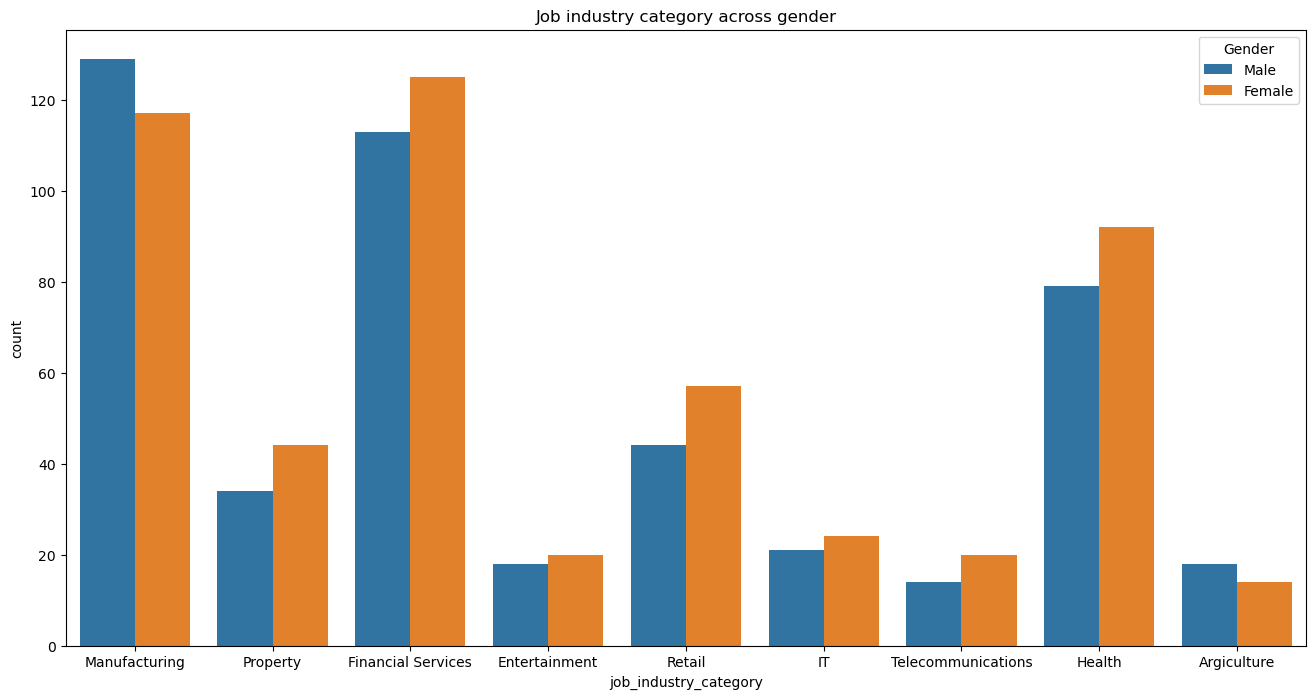

In [65]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data=df2, hue='gender')
plt.legend(title='Gender', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.savefig('job_industry-gender_new.png')
plt.show()

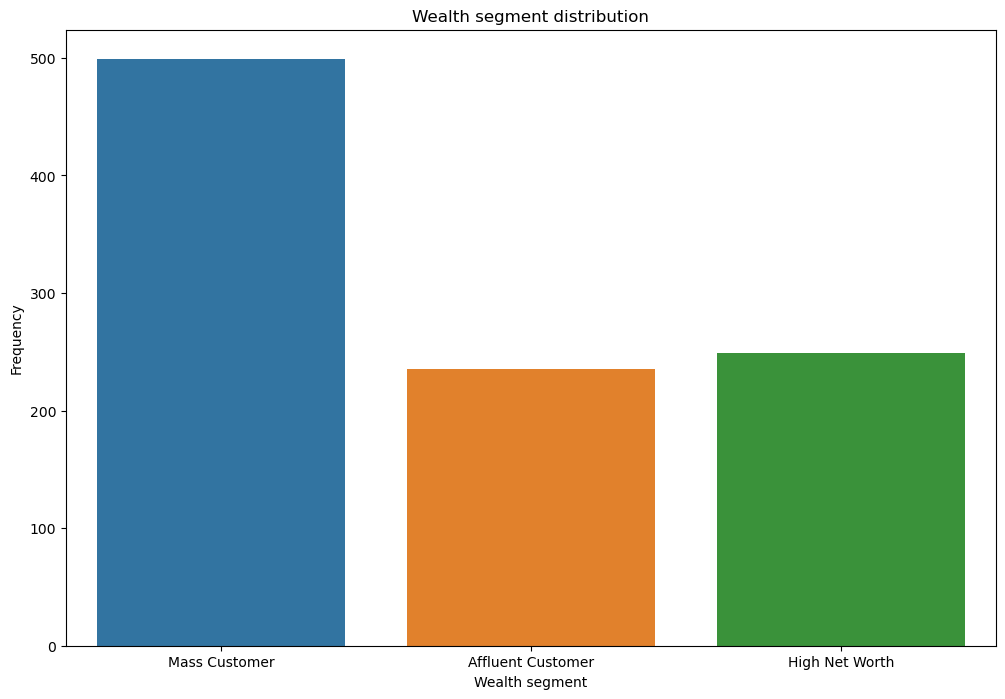

In [66]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'wealth_segment', data = df2)
plt.title('Wealth segment distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
plt.savefig('wealth_segment_new.png')
plt.show()

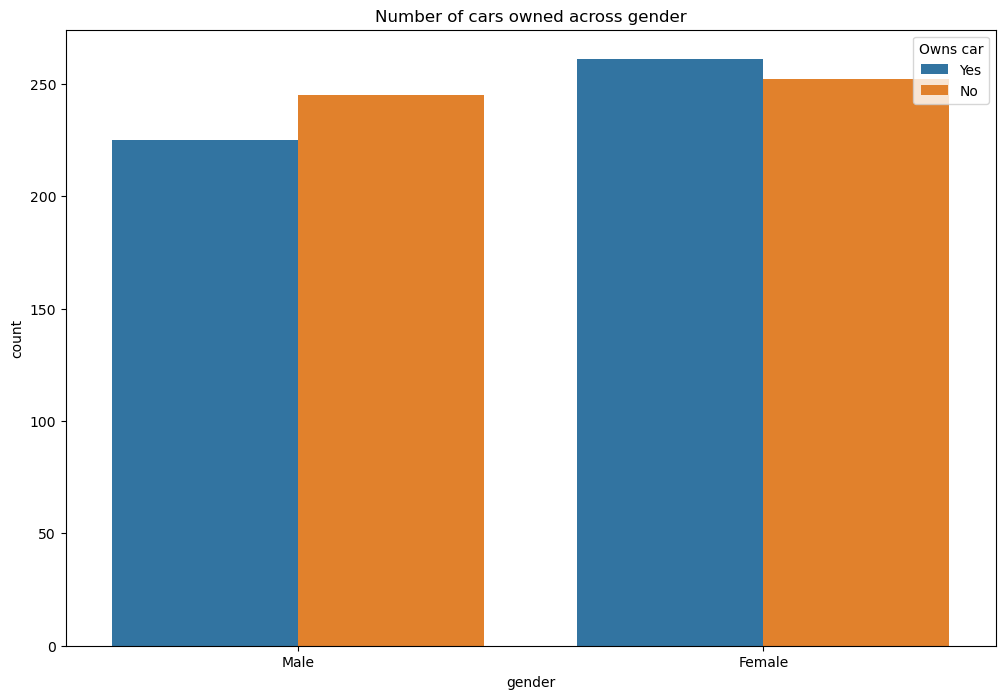

In [67]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df2, hue='owns_car')
plt.legend(title='Owns car', loc='upper right', fancybox=True)
plt.title('Number of cars owned across gender')
plt.savefig('owns_car_new.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

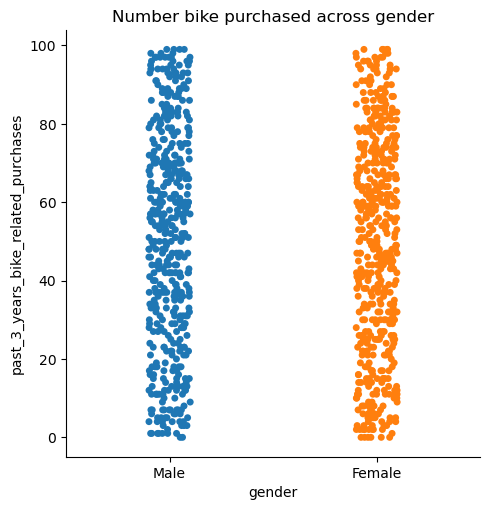

In [68]:
plt.figure(figsize = (12,8))
sn.catplot(data=df2, x='gender', y='past_3_years_bike_related_purchases')
plt.title('Number bike purchased across gender')
plt.savefig('bike_purchase_new.png')
plt.show()

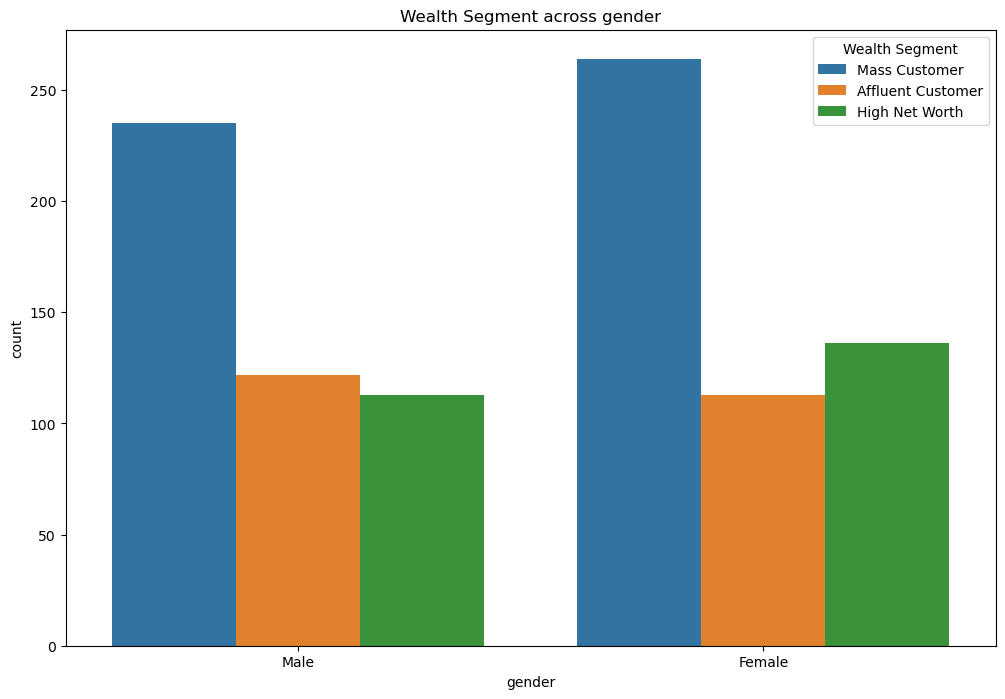

In [69]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df2, hue='wealth_segment')
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across gender')
plt.savefig('wealth_segment-gender_new.png')
plt.show()

<Figure size 1600x800 with 0 Axes>

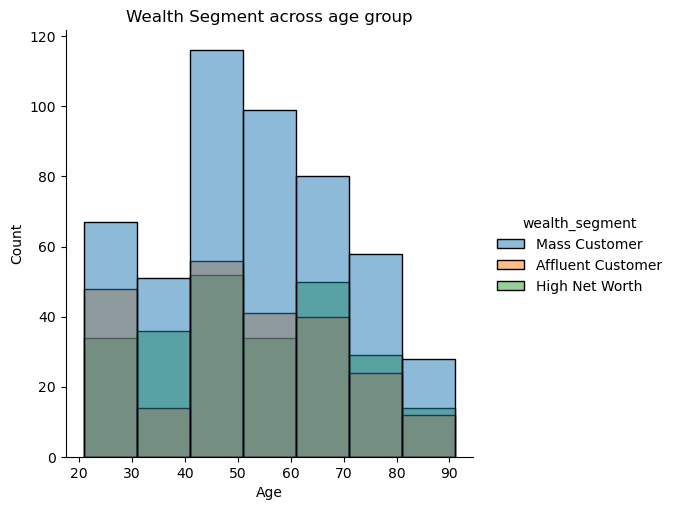

In [70]:
plt.figure(figsize = (16,8))
sn.displot(x='Age', binwidth=10, data=df2, hue='wealth_segment')
plt.title('Wealth Segment across age group')
plt.savefig('wealth_segment-age_new.png')
plt.show()

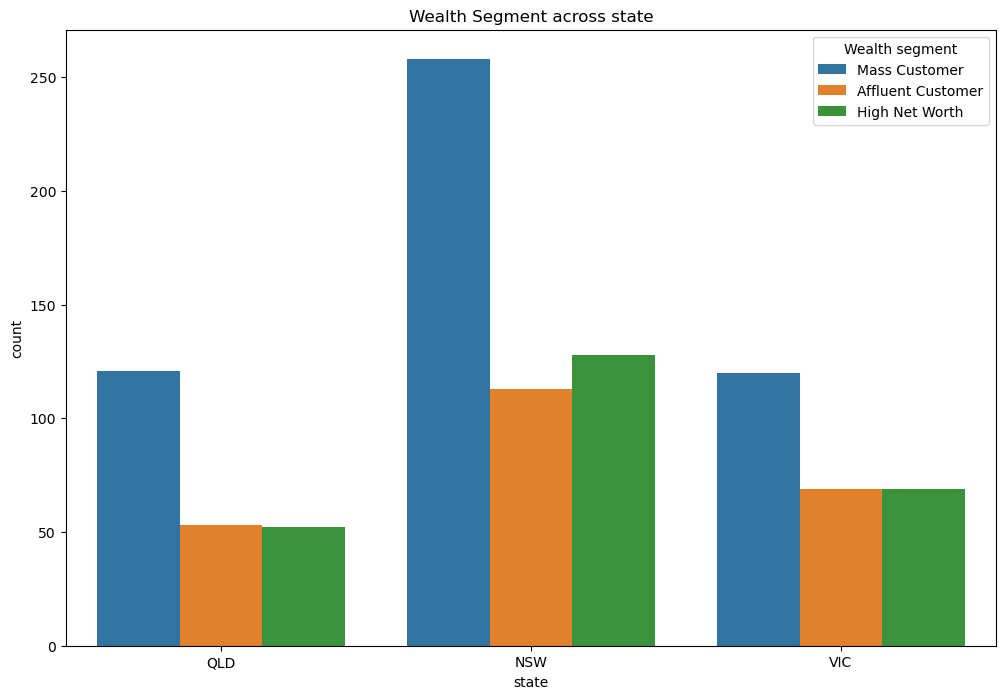

In [71]:
plt.figure(figsize = (12,8))
sn.countplot(x='state', data=df2, hue='wealth_segment')
plt.legend(title='Wealth segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across state')
plt.savefig('wealth_segment-state_new.png')
plt.show()

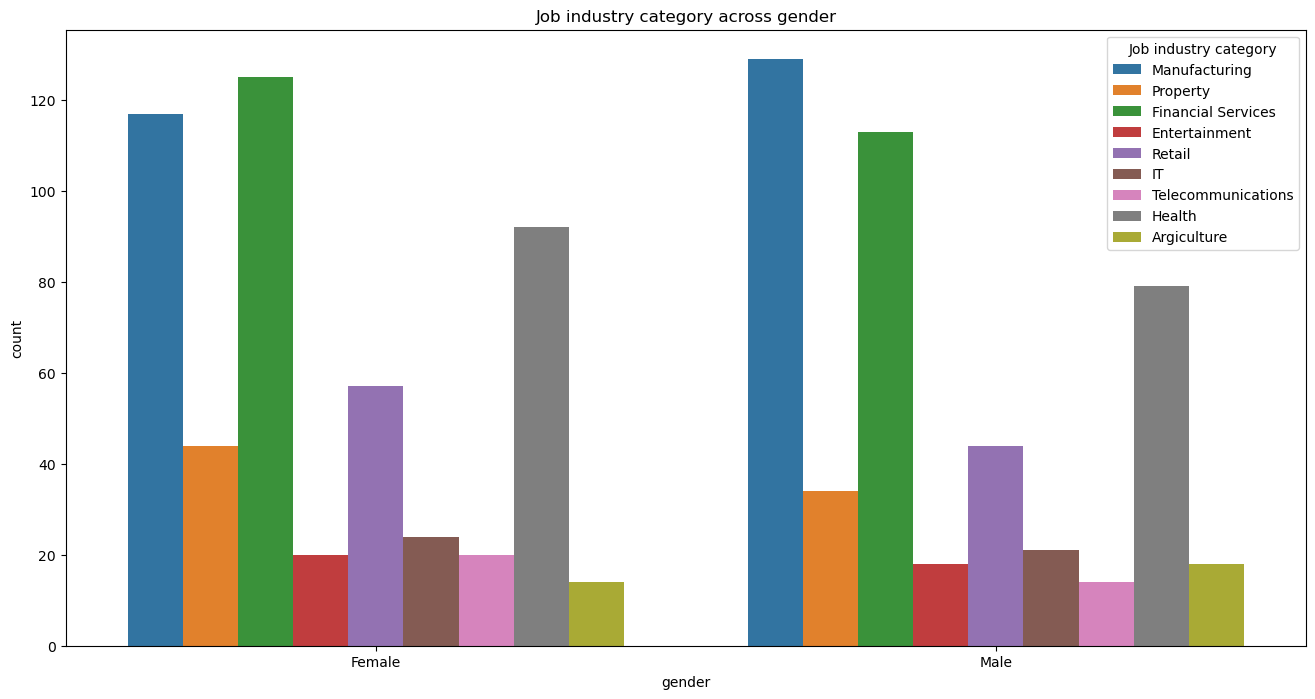

In [72]:
plt.figure(figsize=(16,8))
sn.countplot(x='gender', data=df2, hue='job_industry_category', order = df2['gender'].value_counts().index)
plt.legend(title='Job industry category', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.savefig('job_industry-gender_new.png')
plt.show()

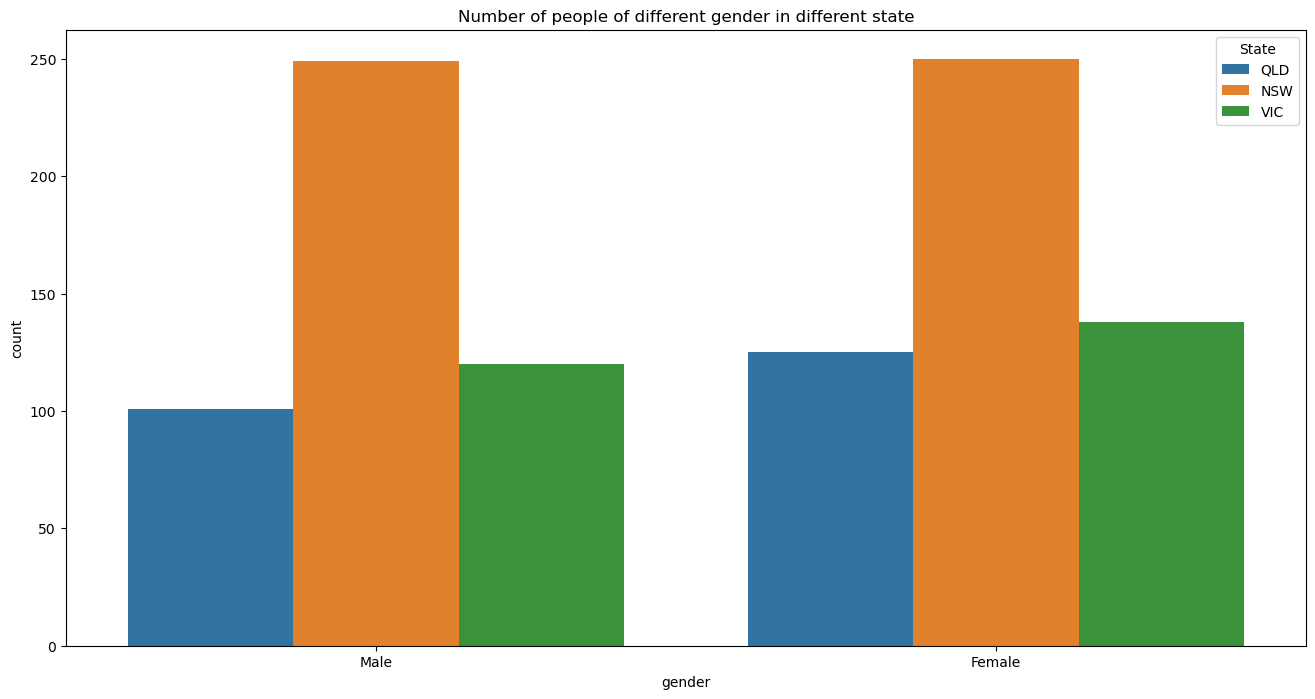

In [73]:
plt.figure(figsize = (16,8))
sn.countplot(x='gender', data=df2, hue='state')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people of different gender in different state')
plt.savefig('state-gender_new.png')
plt.show()

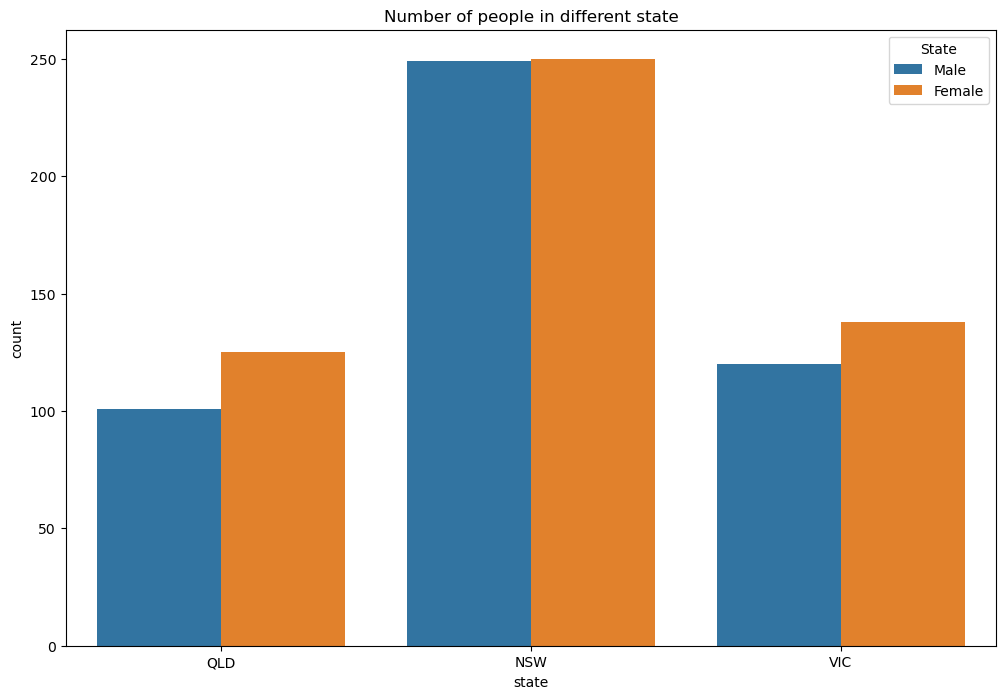

In [74]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'state', data = df2, hue = 'gender')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people in different state')
plt.savefig('gender-state_new.png')
plt.show()

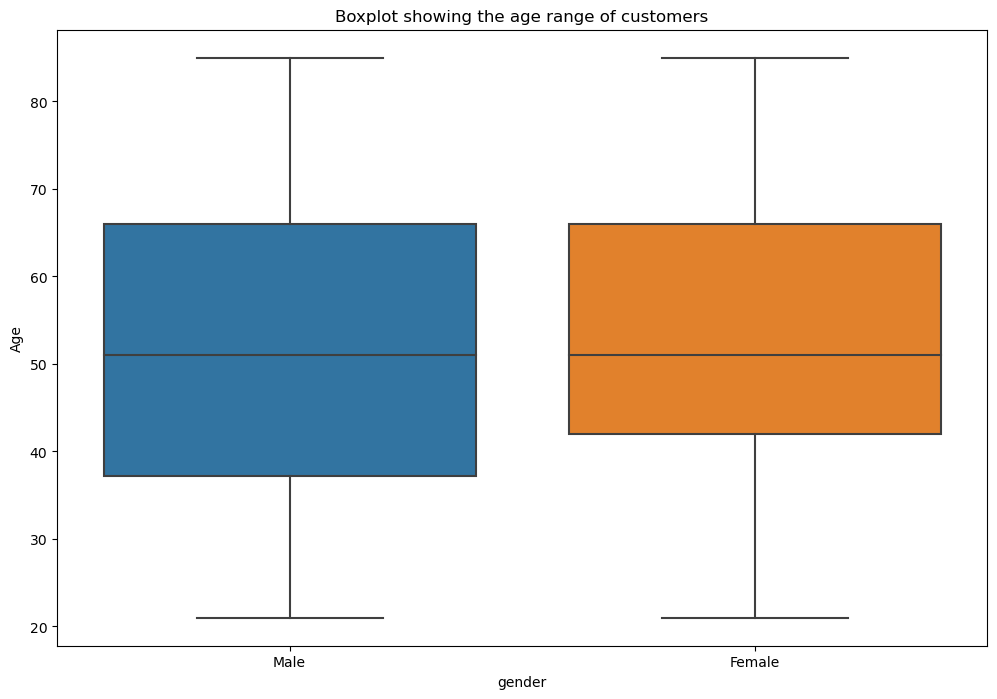

In [75]:
plt.figure(figsize = (12,8))
sn.boxplot(x = df2['gender'], y = df2['Age'])
plt.title('Boxplot showing the age range of customers')
plt.savefig('age_boxplot_new.png')
plt.show()

In [76]:
#print the final file to excel ready to be used as a data source for dashboard
df.to_excel('./current_customers.xlsx', sheet_name='123', index=False)
df2.to_excel('./target_new_customers.xlsx', sheet_name='4', index=False)